This notebook is for making velcoity plots in x,y,z galactocentric coordinates

In [50]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
%matplotlib inline
mpl.rcParams.update({'font.size': 24})
#from astropy.visualization import astropy_mpl_style
#plt.style.use(astropy_mpl_style)
import astropy.coordinates as coord
from astropy.coordinates import SkyCoord
import astropy.units as u
from astropy.io import fits, ascii
from astropy.table import Table, Column, vstack, hstack, join

import MagellanicStream as ms

import warnings
warnings.filterwarnings('ignore')

In [3]:
#find duplicates
def list_duplicates(seq):
    seen = set()
    seen_add = seen.add
    # adds all elements it doesn't know yet to seen and all other to seen_twice
    seen_twice = set( x for x in seq if x in seen or seen_add(x) )
    # turn the set into a list (as requested)
    return list( seen_twice )

In [4]:
#break up the monarch table to add in seven additional sources
monarch = fits.getdata('/Users/joshpovick/Desktop/Research/MS_young/monarch.fits',1)
tmon = Table(monarch)
tmon.sort('NAME')

dupwhere = np.where((tmon['tdupont_oid']!=999999)&(tmon['bstars2_oid']==999999))
bstwhere = np.where((tmon['bstars2_oid']!=999999)&(tmon['tdupont_oid']==999999))

duptab = tmon[dupwhere]
duptab.add_row(np.arange(141))
duptab.add_row(np.arange(141))
duptab.add_row(np.arange(141))
duptab.add_row(np.arange(141))
duptab.add_row(np.arange(141))
duptab.add_row(np.arange(141))
duptab.add_row(np.arange(141))

specfitdup = fits.getdata('/Users/joshpovick/Desktop/Research/fits/MS_youngfits/dupont_final.fits',1)

addnames = ['DI1294','DI1354','DI1463','DI1516','DI1557','DI1614','DI1678']
for i in range(len(addnames)):
    duptab['NAME'][i+65] = addnames[i]
    duptab['RA'][i+65] = specfitdup['RA'][i+65]
    duptab['DEC'][i+65] = specfitdup['DEC'][i+65]
    duptab['GLON'][i+65] = specfitdup['GLON'][i+65]
    duptab['GLAT'][i+65] = specfitdup['GLAT'][i+65]
    duptab['MLON'][i+65] = specfitdup['MLON'][i+65]
    duptab['MLAT'][i+65] = specfitdup['MLAT'][i+65]
    duptab['V'][i+65] = specfitdup['V'][i+65]
    duptab['BV'][i+65] = specfitdup['BV'][i+65]
    duptab['EBV'][i+65] = specfitdup['EBV'][i+65]
    duptab['VHELIO'][i+65] = specfitdup['VHELIO'][i+65]
    duptab['VERR'][i+65] = specfitdup['VERR'][i+65]
    duptab['VLSR'][i+65] = specfitdup['VLSR'][i+65]
    duptab['VGSR'][i+65] = specfitdup['VGSR'][i+65]

for j in range(len(duptab)):
    duptab['TEFF'][j] = specfitdup['TEFF'][j]
    duptab['TEFFERR'][j] = specfitdup['TEFFERR'][j]
    duptab['LOGG'][j] = specfitdup['LOGG'][j]
    duptab['LOGGERR'][j] = specfitdup['LOGGERR'][j]
    duptab['METAL'][j] = specfitdup['METAL'][j]
    duptab['METALERR'][j] = specfitdup['METALERR'][j]
    duptab['VSINI'][j] = specfitdup['VSINI'][j]
    duptab['VSINIERR'][j] = specfitdup['VSINIERR'][j]
    
bsttab = tmon[bstwhere]


In [5]:
duptab.show_in_browser(jsviewer=True)

In [6]:
#New Gaia Crossmatch for seven new sources at end
#one of the new source is a duplicate from the original B stars but have not determined if there is overlap
#as some of the source are dupliactes but do not overlap in velocity

new = Table()
new['NAME'] = specfitdup['STAR'][65:72]
new['RA'] = specfitdup['RA'][65:72]
new['DEC'] = specfitdup['DEC'][65:72]
new['GLON'] = specfitdup['GLON'][65:72]
new['GLAT'] = specfitdup['GLAT'][65:72]
new['MLON'] = specfitdup['MLON'][65:72]
new['MLAT'] = specfitdup['MLAT'][65:72]
new['V'] = specfitdup['V'][65:72]
new['BV'] = specfitdup['BV'][65:72]
new['EBV'] = specfitdup['EBV'][65:72]
new['VHELIO'] = specfitdup['VHELIO'][65:72]
new['VERR'] = specfitdup['VERR'][65:72]
new['VLSR'] = specfitdup['VLSR'][65:72]
new['VGSR'] = specfitdup['VGSR'][65:72]
new['TEFF'] = specfitdup['TEFF'][65:72]
new['TEFFERR'] = specfitdup['TEFFERR'][65:72]
new['LOGG'] = specfitdup['LOGG'][65:72]
new['LOGGERR'] = specfitdup['LOGGERR'][65:72]
new['METAL'] = specfitdup['METAL'][65:72]
new['METALERR'] = specfitdup['METALERR'][65:72]
new['VSINI'] = specfitdup['VSINI'][65:72]
new['VSINIERR'] = specfitdup['VSINIERR'][65:72]


#new.show_in_browser(jsviewer=True)
#new.write('/Users/joshpovick/Desktop/Research/MS_young/new.dat',format='ascii',overwrite=True)

tnew = Table(fits.getdata('/Users/joshpovick/Desktop/Research/MS_young/new7as.fits',1))
#tnew.show_in_browser(jsviewer=True)
tnew['col1'].name = 'NAME'
tnew['col2'].name = 'RA'
tnew['col3'].name = 'DEC'
tnew['col4'].name = 'GLON'
tnew['col5'].name = 'GLAT'
tnew['col6'].name = 'MLON'
tnew['col7'].name = 'MLAT'
tnew['col8'].name = 'V'
tnew['col9'].name = 'BV'
tnew['col10'].name = 'EBV'
tnew['col11'].name = 'VHELIO'
tnew['col12'].name = 'VERR'
tnew['col13'].name = 'VLSR'
tnew['col14'].name = 'VGSR'
tnew['col15'].name = 'TEFF'
tnew['col16'].name = 'TEFFERR'
tnew['col17'].name = 'LOGG'
tnew['col18'].name = 'LOGGERR'
tnew['col19'].name = 'METAL'
tnew['col20'].name = 'METALERR'
tnew['col21'].name = 'VSINI'
tnew['col22'].name= 'VSINIERR'

list_duplicates(tnew['NAME'])
print(tnew['dist'][np.where(tnew['NAME']=='DI1557')])
print(np.squeeze(np.where(tnew['NAME']=='DI1557')))
print(tnew['dist'][np.where(tnew['NAME']=='DI1294')])
print(np.squeeze(np.where(tnew['NAME']=='DI1294')))
keepidx = np.delete(range(len(tnew)),[5,0])
print(keepidx)
tnew = tnew[keepidx]

         dist         
----------------------
 0.0014728205016436855
0.00029357497558518984
[5 6]
         dist         
----------------------
 0.0016075697100035315
0.00042522184696115994
[0 1]
[1 2 3 4 6 7 8]


In [99]:
consort = vstack([bsttab,duptab[0:65],tnew])
consort = Table(consort)
consort.write('/Users/joshpovick/Desktop/Research/fits/MS_youngfits/consort.fits',format='fits',overwrite=True)

In [8]:
clean = np.where((consort['parallax']>0)&(consort['parallax_over_error']>3))
heir  = consort[clean]
heir.write('/Users/joshpovick/Desktop/Research/fits/MS_youngfits/heir.fits',format='fits',overwrite=True)

From here on out only the closest stars $(d\leq 8\,kpc)$ are considered

In [9]:
#convert to galactocentric coordinates (x,y,z)
from astropy.coordinates import Distance

galact = []
for i in range(len(heir)):
    cr = coord.ICRS(ra=heir['RA'][i]*u.degree, dec=heir['DEC'][i]*u.degree, \
                        distance=Distance(parallax=(heir['parallax'][i]+0.052)*u.mas,allow_negative=True),\
                        pm_ra_cosdec=heir['pmra'][i]*u.mas/u.yr,\
                        pm_dec=heir['pmdec'][i]*u.mas/u.yr,
                        radial_velocity=heir['VLSR'][i]*u.km/u.s)
    gcoor = cr.transform_to(coord.Galactocentric)
    galact.append(np.append(gcoor,heir['NAME'][i]))

In [10]:
#uncertainty for the above cell by adding the uncertainties in parallax, pm, and vhelio
#and running again cell

galact_w_err = []
for i in range(len(heir)):
    cr = coord.ICRS(ra=heir['RA'][i]*u.degree,\
                    dec=heir['DEC'][i]*u.degree,\
                    distance=Distance(parallax=(heir['parallax'][i]+0.052+heir['parallax_error'][i])*u.mas,allow_negative=True),\
                    pm_ra_cosdec=(heir['pmra'][i]+heir['pmra_error'][i])*u.mas/u.yr,\
                    pm_dec=(heir['pmdec'][i]+heir['pmdec_error'][i])*u.mas/u.yr,\
                    radial_velocity=(heir['VLSR'][i]+heir['VERR'][i])*u.km/u.s)
    gcoor = cr.transform_to(coord.Galactocentric)
    galact_w_err.append(np.append(gcoor,heir['NAME'][i]))

In [11]:
#velocities and error
xvel = []
yvel = []
zvel = []
name = []

for i in range(len(galact)):
    name.append(galact[i][1])
    xvel.append((galact[i][0].v_x).value)
    yvel.append((galact[i][0].v_y).value)
    zvel.append((galact[i][0].v_z).value)
    
xvel=np.squeeze(xvel)
yvel=np.squeeze(yvel)
zvel=np.squeeze(zvel)

xvel_w_err = []
yvel_w_err = []
zvel_w_err = []

for i in range(len(galact)):
    xvel_w_err.append((galact_w_err[i][0].v_x).value)
    yvel_w_err.append((galact_w_err[i][0].v_y).value)
    zvel_w_err.append((galact_w_err[i][0].v_z).value)
    
xvel_w_err=np.squeeze(xvel_w_err)
yvel_w_err=np.squeeze(yvel_w_err)
zvel_w_err=np.squeeze(zvel_w_err)

xvel_err = np.subtract(xvel_w_err,xvel)
yvel_err = np.subtract(yvel_w_err,yvel)
zvel_err = np.subtract(zvel_w_err,zvel)

#position and error
xpos = []
ypos = []
zpos = []

for i in range(len(galact)):
    xpos.append((galact[i][0].x).value*1/1000.)
    ypos.append((galact[i][0].y).value*1/1000.)
    zpos.append((galact[i][0].z).value*1/1000.)
    
xpos=np.squeeze(xpos)
ypos=np.squeeze(ypos)
zpos=np.squeeze(zpos)

xpos_w_err = []
ypos_w_err = []
zpos_w_err = []

for i in range(len(galact)):
    xpos_w_err.append((galact_w_err[i][0].x).value*1/1000.)
    ypos_w_err.append((galact_w_err[i][0].y).value*1/1000.)
    zpos_w_err.append((galact_w_err[i][0].z).value*1/1000.)
    
xpos_w_err=np.squeeze(xpos_w_err)
ypos_w_err=np.squeeze(ypos_w_err)
zpos_w_err=np.squeeze(zpos_w_err)

xpos_err = np.subtract(xpos_w_err,xpos)
ypos_err = np.subtract(ypos_w_err,ypos)
zpos_err = np.subtract(zpos_w_err,zpos)

In [12]:
#get color for stars based on distance
col=np.reciprocal(heir['parallax']+0.052)
col = np.squeeze(col)

In [13]:
#convert to MS coordinates
lms = []
bms = []

for i in range(len(heir)):
    c_icrs = SkyCoord(ra=heir['RA'][i]*u.degree, dec=heir['DEC'][i]*u.degree)
    c_ms = c_icrs.transform_to(ms.MagellanicStream)
    ms_l,ms_b = c_ms.MSLongitude.degree, c_ms.MSLatitude.degree
    ms_l = ms_l-360
    lms.append(ms_l)
    bms.append(ms_b)

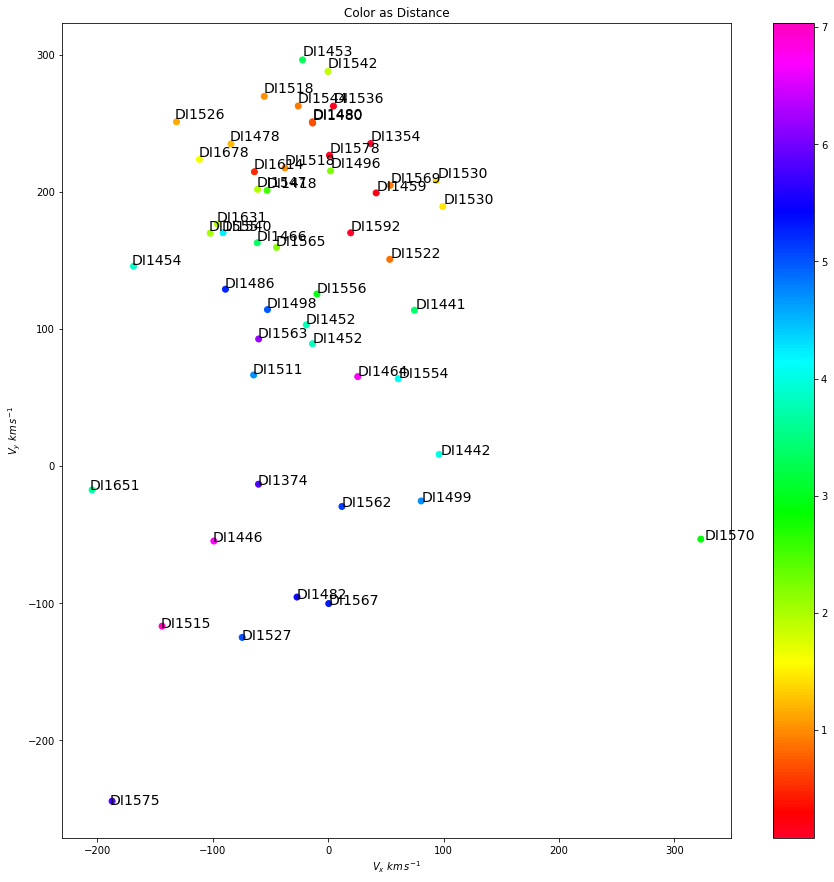

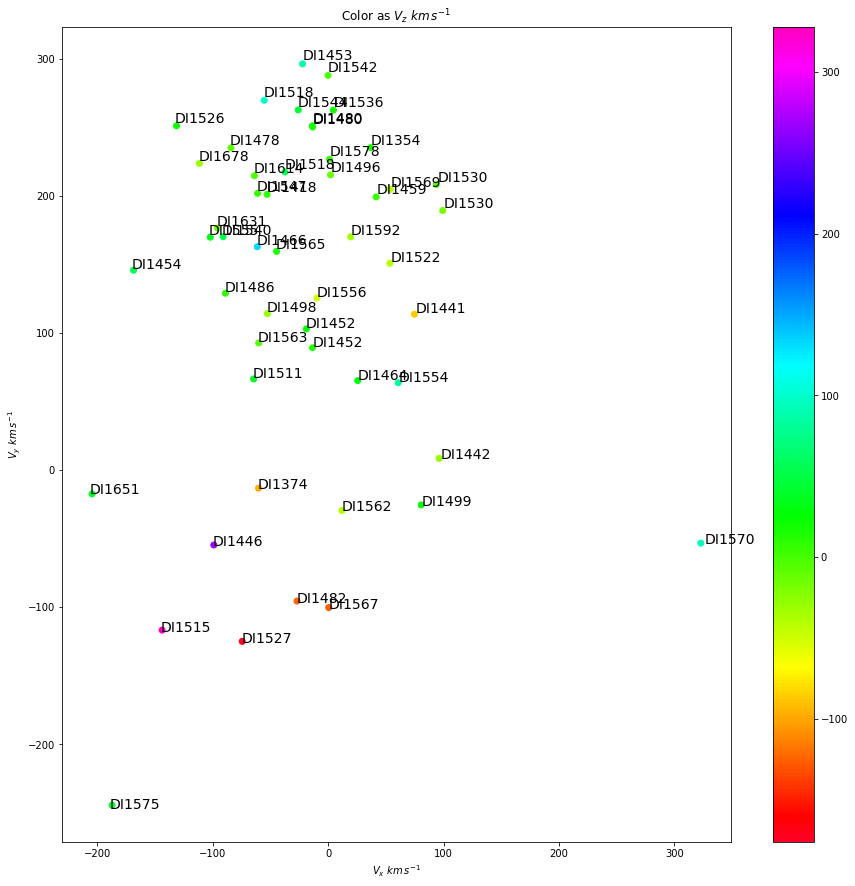

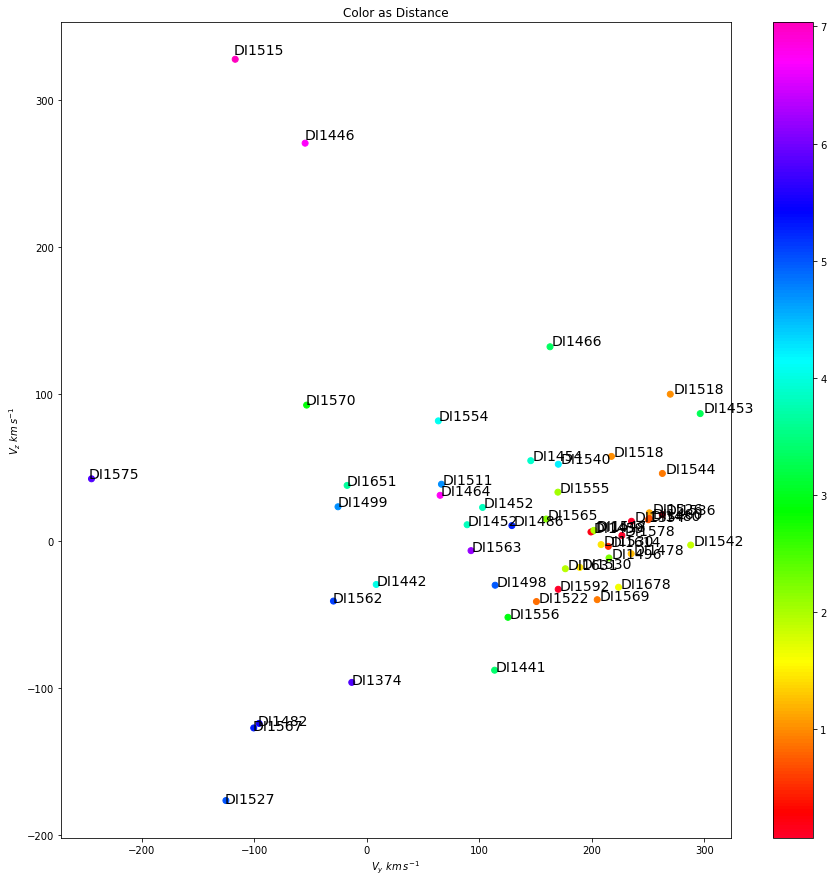

In [14]:
#velocity plots
plt.figure(figsize = (15,15))
plt.scatter(xvel.data,yvel.data,c=col.data,cmap='gist_rainbow')
plt.colorbar()
plt.xlabel(r'$V_{x}$ $km\,s^{-1}$')
plt.ylabel(r'$V_{y}$ $km\,s^{-1}$')
plt.title(r'Color as Distance')
for i in range(len(lms)):
    plt.text(xvel[i]*(1+0.01),yvel[i]*(1+0.01),galact[i][1],fontsize=14)
plt.show()

plt.figure(figsize = (15,15))
plt.scatter(xvel.data,yvel.data,c=zvel.data,cmap='gist_rainbow')
plt.colorbar()
plt.xlabel(r'$V_{x}$ $km\,s^{-1}$')
plt.ylabel(r'$V_{y}$ $km\,s^{-1}$')
plt.title(r'Color as $V_{z}$ $km\,s^{-1}$')
for i in range(len(lms)):
    plt.text(xvel[i]*(1+0.01),yvel[i]*(1+0.01),galact[i][1],fontsize=14)
plt.show()

plt.figure(figsize = (15,15))
plt.scatter(yvel,zvel,c=col,cmap='gist_rainbow')
plt.colorbar()
plt.xlabel(r'$V_{y}$ $km\,s^{-1}$')
plt.ylabel(r'$V_{z}$ $km\,s^{-1}$')
plt.title(r'Color as Distance')
for i in range(len(lms)):
    plt.text(yvel[i]*(1+0.01),zvel[i]*(1+0.01),galact[i][1],fontsize=14)
plt.show()

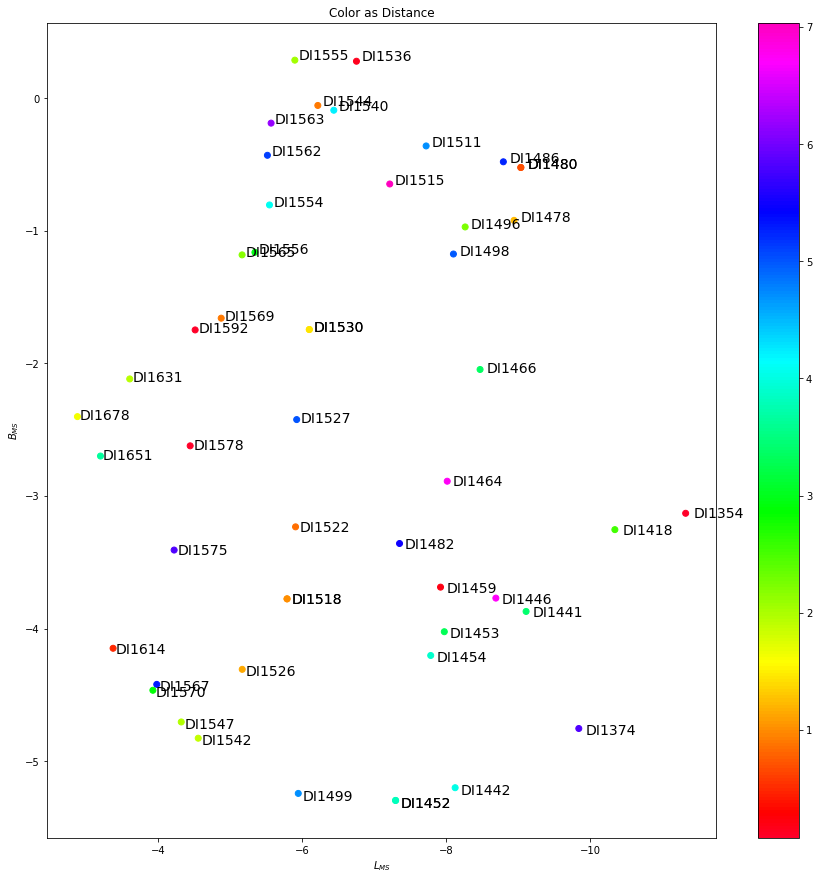

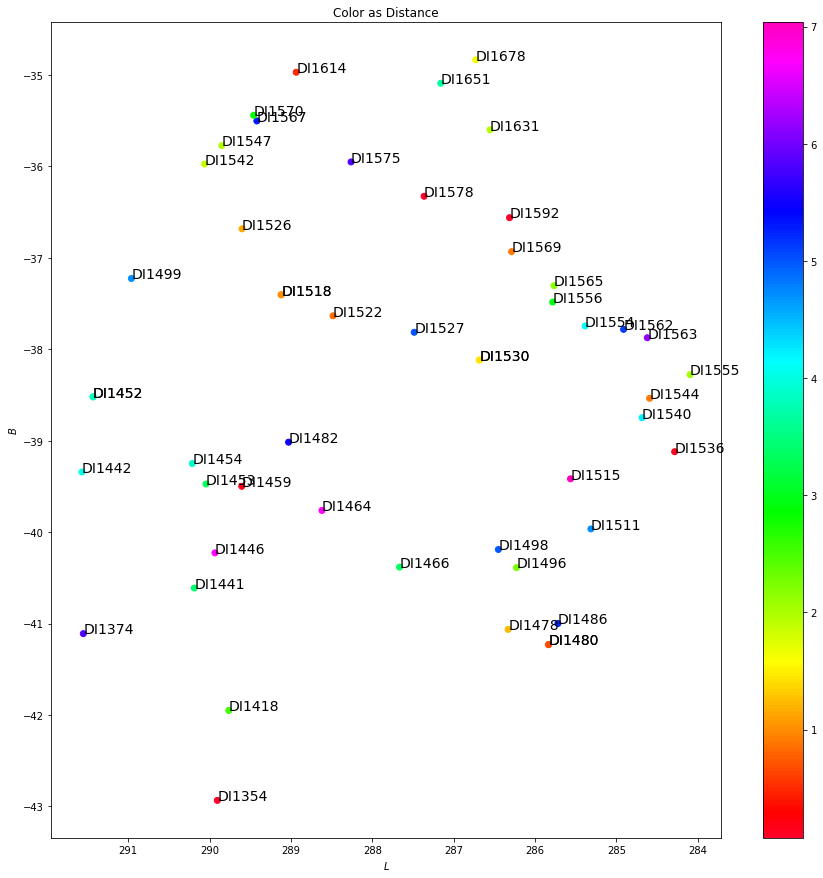

In [15]:
#position distance plot Magellanic Stream Coordinates
plt.figure(figsize = (15,15))
plt.scatter(lms,bms,c=col,cmap='gist_rainbow')
plt.colorbar()
plt.gca().invert_xaxis()
plt.xlabel(r'$L_{MS}$')
plt.ylabel(r'$B_{MS}$')
plt.title(r'Color as Distance')
for i in range(len(lms)):
    plt.text(lms[i]*(1+0.01),bms[i]*(1+0.01),galact[i][1],fontsize=14)
plt.show()

#position distance plot Galactic Coordinates
plt.figure(figsize = (15,15))
plt.scatter(heir['GLON'],heir['GLAT'],c=col,cmap='gist_rainbow')
plt.colorbar()
plt.xlabel(r'$L$')
plt.ylabel(r'$B$')
plt.title(r'Color as Distance')
for i in range(len(heir)):
    plt.text(heir['GLON'][i],heir['GLAT'][i],heir['NAME'][i],fontsize=14)
plt.gca().invert_xaxis()
plt.show()

In [16]:
#Convert pmra and pmdec to pml and pmb (Galactic coordinates)
def pm_radec2gal(pmra,pmdec,ra,dec):
    lpm = []
    bpm = []
    alp_G = 192.85948
    del_G = 27.12825
    l_NGP = 122.93192
    rad = np.pi/180
    for i in range(len(pmra)):
        c1 = np.sin(del_G*rad)*np.cos(dec[i]*rad)-np.cos(del_G)*np.sin(dec[i])*np.cos((ra[i]-alp_G)*rad)
        c2 = np.cos(del_G*rad)*np.sin((ra[i]-alp_G)*rad)
        cosb = np.sqrt(c1**2+c2**2)
        trans_mat = (1/cosb)*np.array([[c1,c2],[-c2,c1]])
        pm_radec = np.array([pmra[i],pmdec[i]])
        pm_gal = np.matmul(trans_mat,pm_radec)
        lpm.append(pm_gal[0])
        bpm.append(pm_gal[1])
    return lpm, bpm

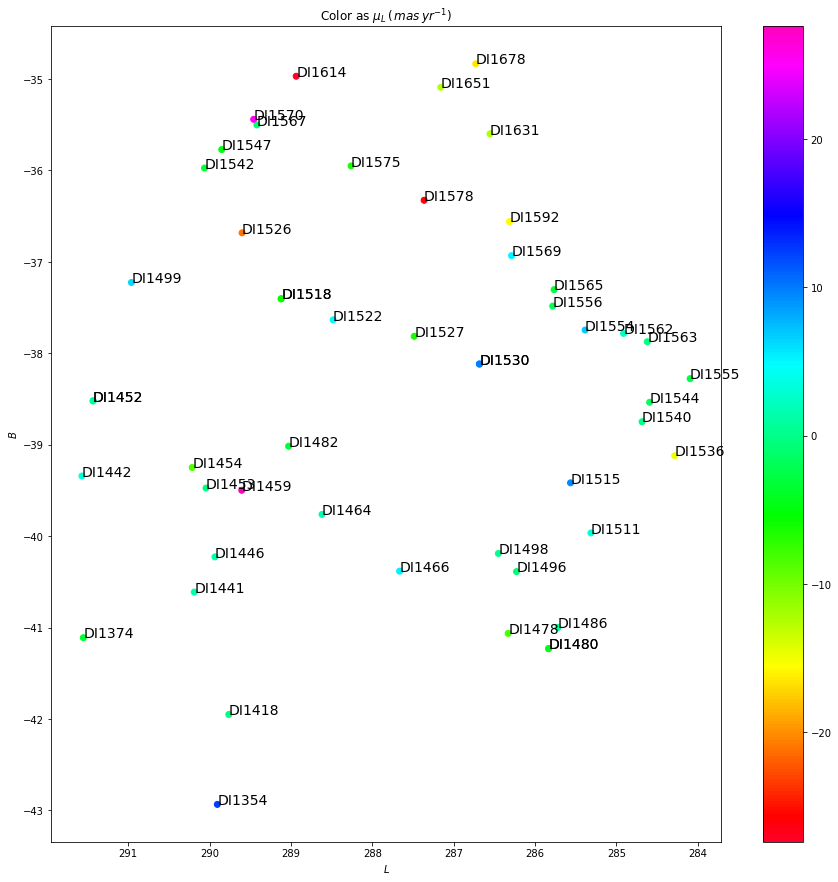

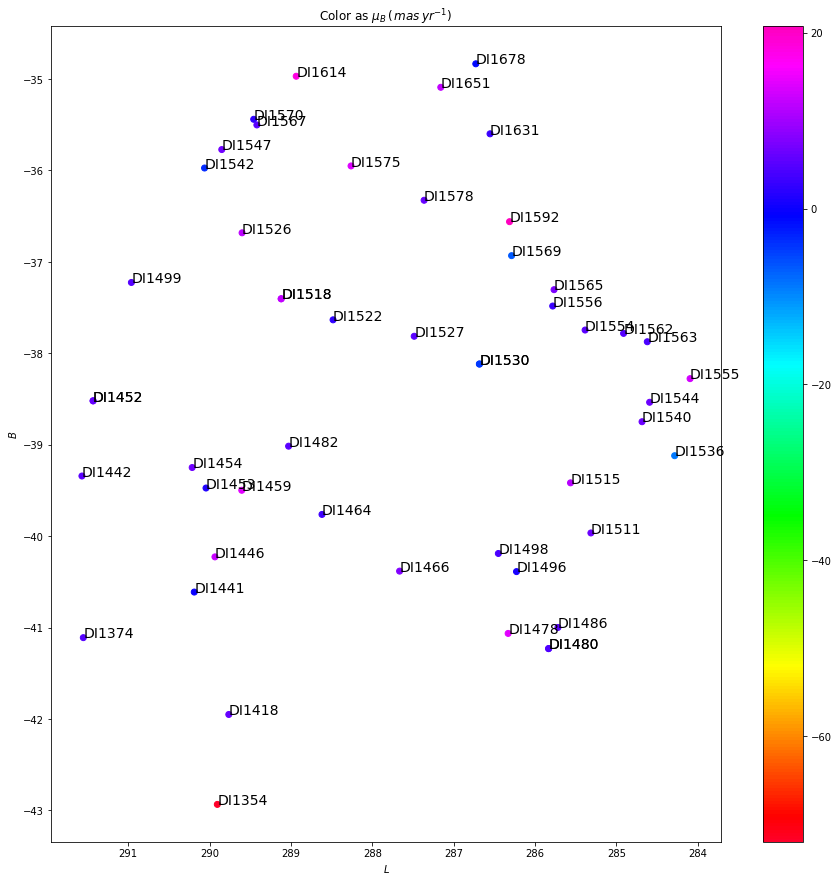

In [17]:
#proper motion plots
pml,pmb = pm_radec2gal(heir['pmra'],heir['pmdec'],heir['RA'],heir['DEC'])

#plot Magellanic Stream Coordinates
#plt.figure(figsize = (15,15))
#plt.scatter(lms,bms,c=pml,cmap='hsv')
#plt.colorbar()
#plt.gca().invert_xaxis()
#plt.xlabel(r'$L_{MS}$')
#plt.ylabel(r'$B_{MS}$')
#plt.title(r'Color as $$')
#for i in range(len(lms)):
#    plt.text(lms[i]*(1+0.01),bms[i]*(1+0.01),heir['NAME'][i],fontsize=14)
#plt.show()

#plot Galactic Coordinates
plt.figure(figsize = (15,15))
plt.scatter(heir['GLON'],heir['GLAT'],c=pml,cmap='gist_rainbow')
plt.colorbar()
plt.xlabel(r'$L$')
plt.ylabel(r'$B$')
plt.title(r'Color as $\mu_{L}\, (\,mas\,yr^{-1})$')
for i in range(len(heir)):
    plt.text(heir['GLON'][i],heir['GLAT'][i],heir['NAME'][i],fontsize=14)
plt.gca().invert_xaxis()
plt.show()

plt.figure(figsize = (15,15))
plt.scatter(heir['GLON'],heir['GLAT'],c=pmb,cmap='gist_rainbow')
plt.colorbar()
plt.xlabel(r'$L$')
plt.ylabel(r'$B$')
plt.title(r'Color as $\mu_{B}\, (\,mas\,yr^{-1})$')
for i in range(len(heir)):
    plt.text(heir['GLON'][i],heir['GLAT'][i],heir['NAME'][i],fontsize=14)
plt.gca().invert_xaxis()
plt.show()

In [92]:
#angular momentum calculation with uncertainties
import uncertainties
from uncertainties import ufloat

l = []
l_w_err = []

for i in range(len(galact)):
    r = [xpos[i],ypos[i],zpos[i]]
    v = [xvel[i],yvel[i],zvel[i]]
    l.append(np.cross(r,v))
    
fx = ufloat(xpos[i],np.absolute(xpos_err[i]))
fy = ufloat(ypos[i],np.absolute(ypos_err[i]))
fz = ufloat(zpos[i],np.absolute(zpos_err[i]))
fvx = ufloat(xvel[i],np.absolute(xvel_err[i]))
fvy = ufloat(yvel[i],np.absolute(yvel_err[i]))
fvz = ufloat(zvel[i],np.absolute(zvel_err[i]))
 
r_w_err = []
v_w_err = []
for j in range(len(galact)):
    fx = ufloat(xpos[j],np.absolute(xpos_err[j]))
    fy = ufloat(ypos[j],np.absolute(ypos_err[j]))
    fz = ufloat(zpos[j],np.absolute(zpos_err[j]))
    fvx = ufloat(xvel[j],np.absolute(xvel_err[j]))
    fvy = ufloat(yvel[j],np.absolute(yvel_err[j]))
    fvz = ufloat(zvel[j],np.absolute(zvel_err[j]))
    r_w_err.append([fx,fy,fz])
    v_w_err.append([fvx,fvy,fvz])

l_w_err = []
for j0 in range(len(galact)):
    l_w_err.append(np.cross(r_w_err[j0],v_w_err[j0]))

lx_err = []
ly_err = []
lz_err = []
for k in range(len(galact)):
    lx_err.append(l_w_err[k][0].s)
    ly_err.append(l_w_err[k][1].s)
    lz_err.append(l_w_err[k][2].s)
    
l_err = []
test = []
for q in range(len(galact)):
    ltot = np.linalg.norm(l[q])
    test.append(ltot)
    l_err.append(np.sqrt(((l[q][0]/ltot)*lx_err[q])**2+((l[q][1]/ltot)*ly_err[q])**2+((l[q][2]/ltot)*lz_err[q])**2))

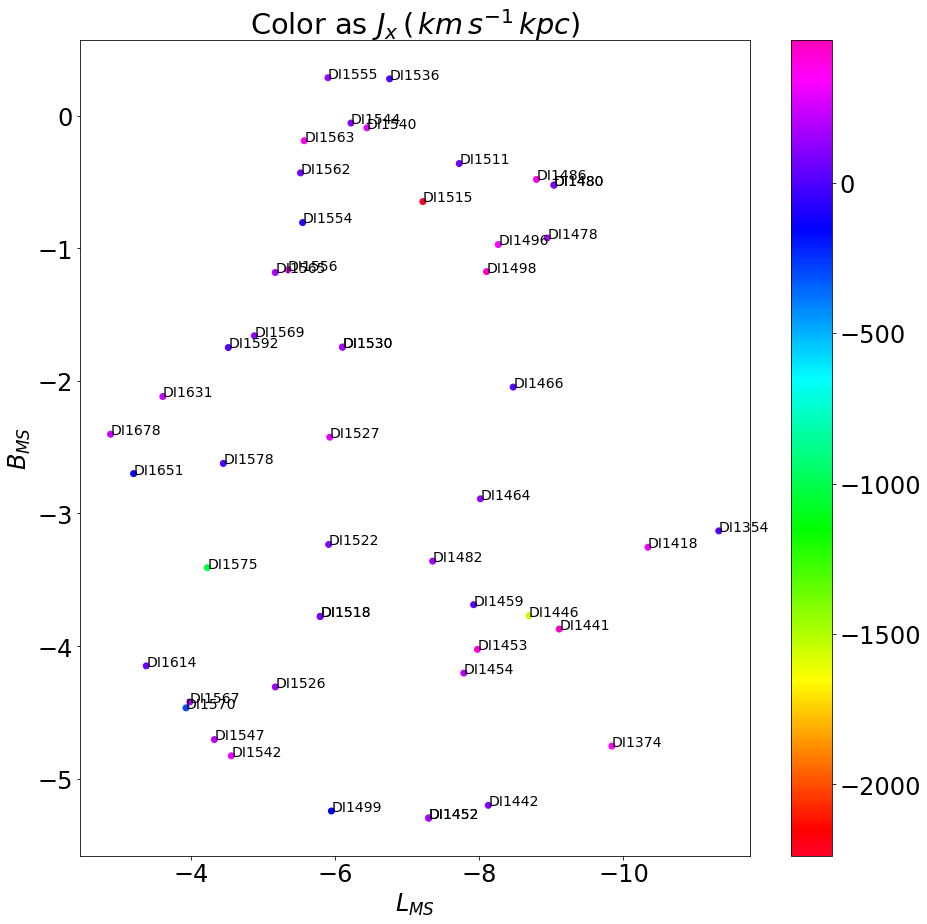

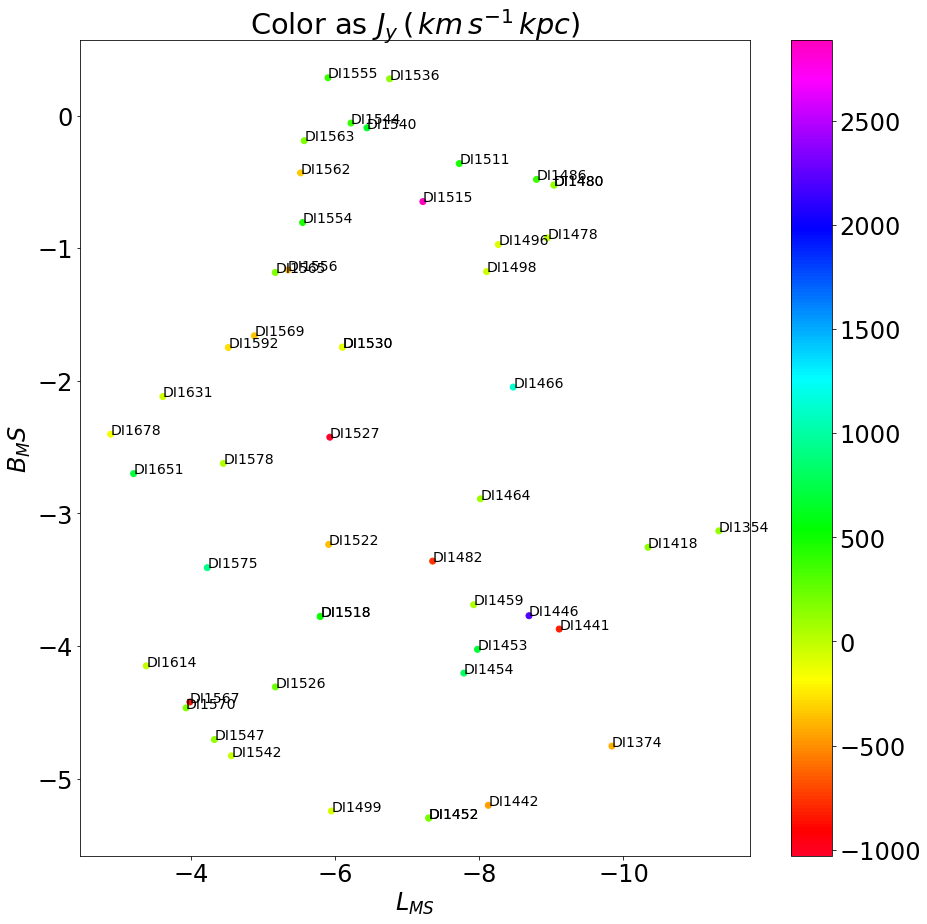

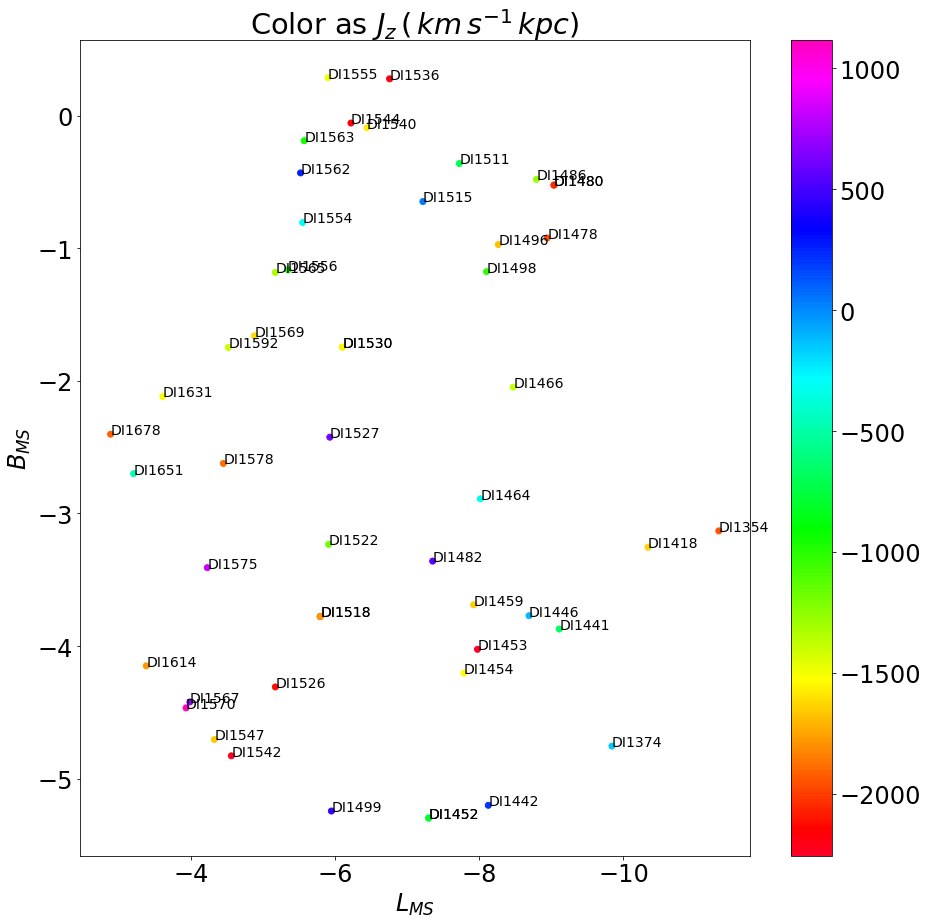

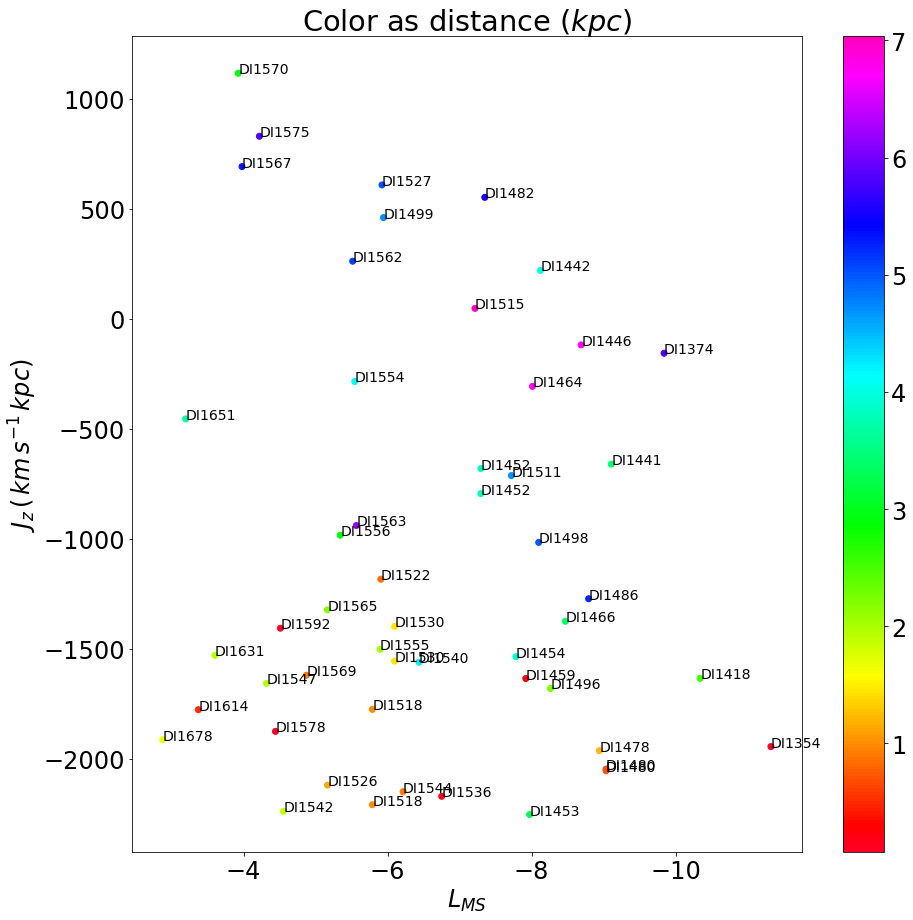

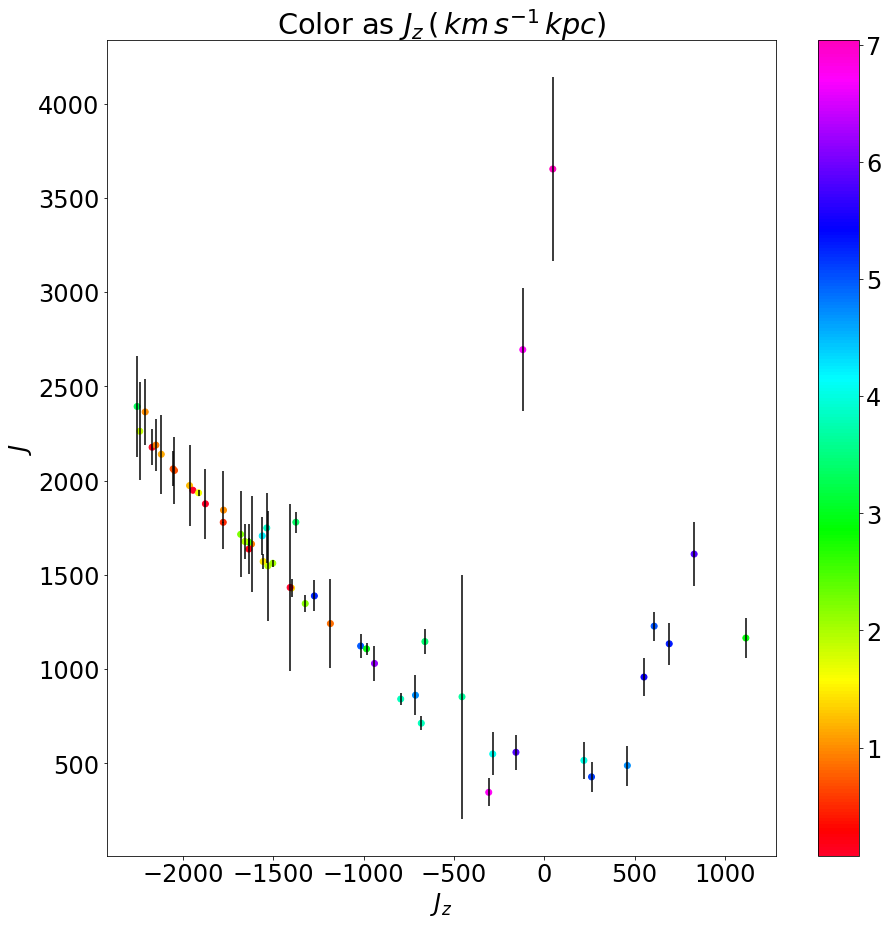

In [98]:
#Angular momentum COM is the Galactic center
jx = []
jy = []
jz = []

for i in range(len(l)):
    jx.append(l[i][0])
    jy.append(l[i][1])
    jz.append(l[i][2])

plt.figure(figsize = (15,15))
#plt.scatter(heir['GLON'],heir['GLAT'],c=jx,cmap='gist_rainbow')
plt.scatter(lms,bms,c=jx,cmap='gist_rainbow')
plt.colorbar()
plt.xlabel(r'$L_{MS}$')
plt.ylabel(r'$B_{MS}$')
plt.title(r'Color as $J_{x}\, (\,km\,s^{-1}\,kpc)$')
for i in range(len(heir)):
    #plt.text(heir['GLON'][i],heir['GLAT'][i],heir['NAME'][i],fontsize=14)
    plt.text(lms[i],bms[i],heir['NAME'][i],fontsize=14)
plt.gca().invert_xaxis()
plt.show()

plt.figure(figsize = (15,15))
#plt.scatter(heir['GLON'],heir['GLAT'],c=jy,cmap='gist_rainbow')
plt.scatter(lms,bms,c=jy,cmap='gist_rainbow')
plt.colorbar()
plt.xlabel(r'$L_{MS}$')
plt.ylabel(r'$B_MS$')
plt.title(r'Color as $J_{y}\, (\,km\,s^{-1}\,kpc)$')
for i in range(len(heir)):
    #plt.text(heir['GLON'][i],heir['GLAT'][i],heir['NAME'][i],fontsize=14)
    plt.text(lms[i],bms[i],heir['NAME'][i],fontsize=14)
plt.gca().invert_xaxis()
plt.show()

plt.figure(figsize = (15,15))
#plt.scatter(heir['GLON'],heir['GLAT'],c=jz,cmap='gist_rainbow')
plt.scatter(lms,bms,c=jz,cmap='gist_rainbow')
plt.colorbar()
plt.xlabel(r'$L_{MS}$')
plt.ylabel(r'$B_{MS}$')
plt.title(r'Color as $J_{z}\, (\,km\,s^{-1}\,kpc)$')
for i in range(len(heir)):
    #plt.text(heir['GLON'][i],heir['GLAT'][i],heir['NAME'][i],fontsize=14)
    plt.text(lms[i],bms[i],heir['NAME'][i],fontsize=14)
plt.gca().invert_xaxis()
plt.show()

plt.figure(figsize = (15,15))
plt.scatter(lms,jz,c=np.reciprocal(heir['parallax']+0.052),cmap='gist_rainbow')
plt.colorbar()
plt.xlabel(r'$L_{MS}$')
plt.ylabel(r'$J_{z}\, (\,km\,s^{-1}\,kpc)$')
plt.title(r'Color as distance $(kpc)$')
for i in range(len(heir)):
    plt.text(lms[i],np.array(jz)[i],heir['NAME'][i],fontsize=14)
    #plt.text(lms[i],bms[i],heir['NAME'][i],fontsize=14)
plt.gca().invert_xaxis()
plt.show()

plt.figure(figsize = (15,15))
plt.scatter(jz,np.sqrt(np.square(jx)+np.square(jy)+np.square(jz)),\
            c=np.reciprocal(heir['parallax']+0.052),cmap='gist_rainbow') \
#np.sqrt(np.square(heir['pmra'])+np.square(heir['pmra']))
plt.xlabel(r'$J_{z}$')
plt.ylabel(r'$J$')
plt.title(r'Color as distance (kpc)')
plt.colorbar()
plt.errorbar(jz,np.sqrt(np.square(jx)+np.square(jy)+np.square(jz)),yerr=l_err,linestyle='',c='k')
#plt.errorbar(jz,np.sqrt(np.square(jx)+np.square(jy)+np.square(jz)),yerr=l_err,xerr=lz_err,linestyle='',c='k')
plt.title(r'Color as $J_{z}\, (\,km\,s^{-1}\,kpc)$')
#for i in range(len(heir)):
#    plt.text(jz[i],np.sqrt(np.square(jx)+np.square(jy)+np.square(jz))[i],heir['NAME'][i],fontsize=8)
plt.show()

In [20]:
#Get absolute V from original data
absV = []
d = np.reciprocal(heir['parallax']+0.052)*1000
for i in range(len(heir)):
    absV.append(heir['V'][i]-5*np.log10(d[i])+5)
    
#print(absV)

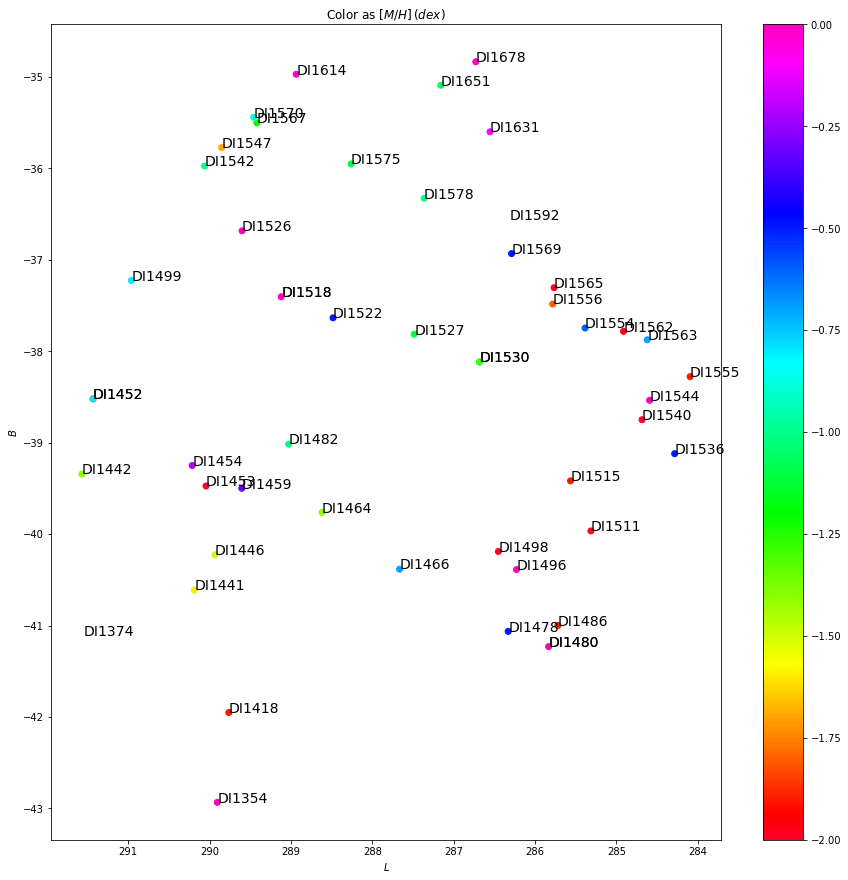

In [21]:
#Metal plot galactic
badmet = np.where(np.isfinite(heir['METAL'])==True)

plt.figure(figsize = (15,15))
plt.scatter(heir['GLON'][badmet],heir['GLAT'][badmet],c=heir['METAL'][badmet],cmap='gist_rainbow')
plt.colorbar()
plt.xlabel(r'$L$')
plt.ylabel(r'$B$')
plt.title(r'Color as $[M/H] \, (dex)$')
for i in range(len(heir)):
    plt.text(heir['GLON'][i],heir['GLAT'][i],heir['NAME'][i],fontsize=14)
plt.gca().invert_xaxis()
plt.show()

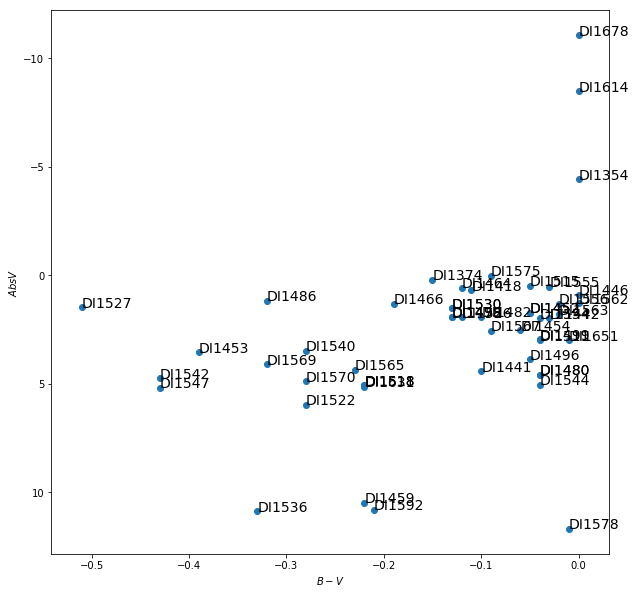

In [22]:
#CMD with closest stars 
plt.figure(figsize = (10,10))
plt.scatter(heir['BV'],absV,cmap='gist_rainbow')
#plt.colorbar()
plt.xlabel(r'$B-V$')
plt.ylabel(r'$Abs V$')
#plt.title(r'Color as $[M/H] \, (dex)$')
for i in range(len(heir)):
    plt.text(heir['BV'][i],absV[i],heir['NAME'][i],fontsize=14)
plt.gca().invert_yaxis()
plt.show()

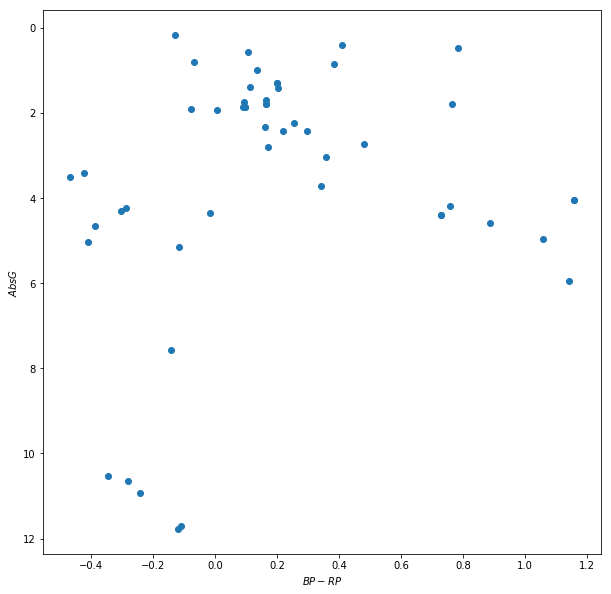

In [23]:
#create CMD for stars in sample with Gaia photometry
absG = []
d = np.reciprocal(heir['parallax']+0.052)*1000
for i in range(len(heir)):
    absG.append(heir['phot_g_mean_mag'][i]-5*np.log10(d[i])+5)

plt.figure(figsize = (10,10))
plt.scatter(heir['phot_bp_mean_mag']-heir['phot_rp_mean_mag'],absG,cmap='gist_rainbow')
#plt.colorbar()
plt.xlabel(r'$BP-RP$')
plt.ylabel(r'$Abs G$')
#plt.title(r'Color as $[M/H] \, (dex)$')
#for i in range(len(heir)):
    #plt.text(heir['phot_bp_mean_mag']-heir['phot_rp_mean_mag'],absG[i],absV[i],heir['NAME'][i],fontsize=14)
plt.gca().invert_yaxis()
plt.show()

In [24]:
#import cone searcg for stars above 80 degrees above galactic plane
north80 = fits.getdata('/Users/joshpovick/Desktop/Research/fits/MS_youngfits/galpolegt80.fits',1)

In [25]:
#get abs mag for stars just imported
absGgalpole80 = []
d = np.reciprocal(north80['parallax']+0.052)*1000
for i in range(len(north80)):
    absGgalpole80.append(north80['phot_g_mean_mag'][i]-5*np.log10(d[i])+5)

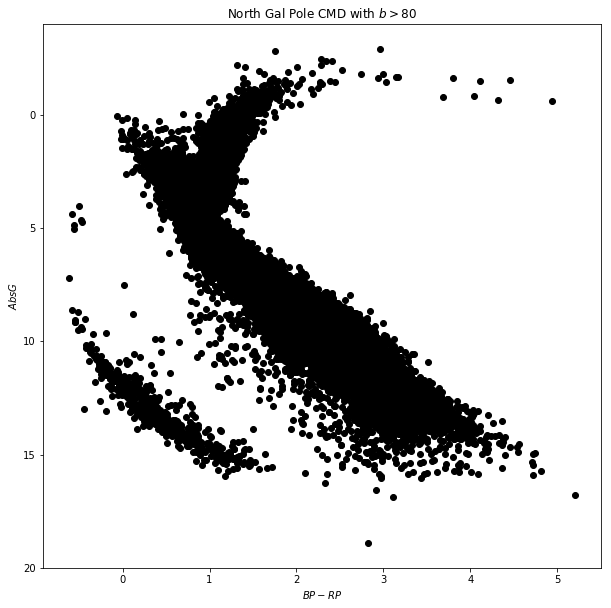

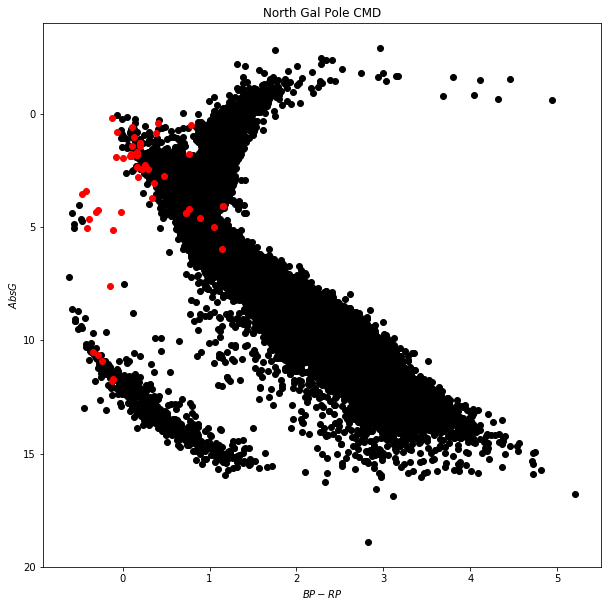

In [26]:
#CMD for b>80
plt.figure(figsize = (10,10))
plt.scatter(north80['bp_rp'],absGgalpole80,c='k')
#plt.colorbar()
plt.xlabel(r'$BP-RP$')
plt.ylabel(r'$Abs G$')
plt.title(r'North Gal Pole CMD with $b>80$')
plt.gca().invert_yaxis()
plt.show()

plt.figure(figsize = (10,10))
plt.scatter(north80['bp_rp'],absGgalpole80,c='k')
plt.scatter(heir['phot_bp_mean_mag']-heir['phot_rp_mean_mag'],absG,c='r',cmap='gist_rainbow')
plt.xlabel(r'$BP-RP$')
plt.ylabel(r'$Abs G$')
plt.title(r'North Gal Pole CMD')
plt.gca().invert_yaxis()
plt.show()

In [27]:
#import and get abs mag for stars above 50 degrees
north50 = fits.getdata('/Users/joshpovick/Desktop/Research/fits/MS_youngfits/galpolegt50.fits',1)

absGgalpole50 = []
d = np.reciprocal(north50['parallax']+0.052)*1000
for i in range(len(north50)):
    absGgalpole50.append(north50['phot_g_mean_mag'][i]-5*np.log10(d[i])+5)

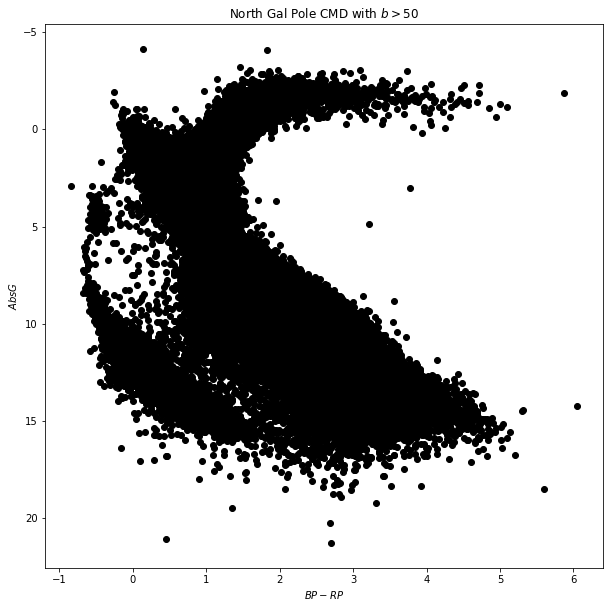

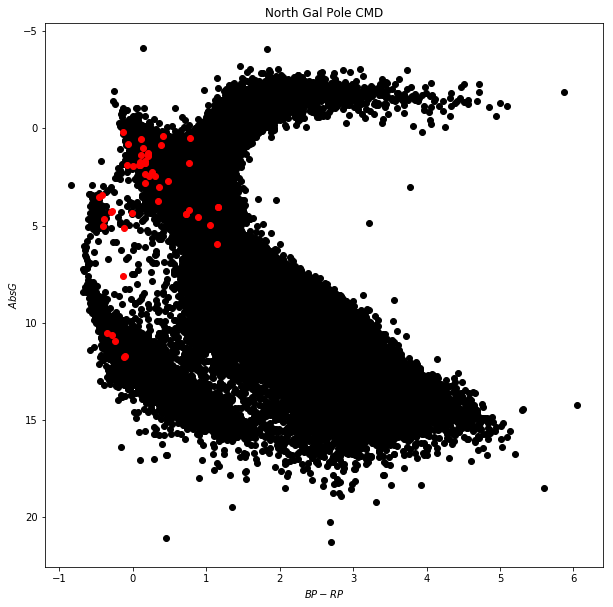

In [28]:
#CMD for b>50
plt.figure(figsize = (10,10))
plt.scatter(north50['bp_rp'],absGgalpole50,c='k')
plt.xlabel(r'$BP-RP$')
plt.ylabel(r'$Abs G$')
plt.title(r'North Gal Pole CMD with $b>50$')
plt.gca().invert_yaxis()
plt.show()

plt.figure(figsize = (10,10))
plt.scatter(north50['bp_rp'],absGgalpole50,c='k')
plt.scatter(heir['phot_bp_mean_mag']-heir['phot_rp_mean_mag'],absG,c='r',cmap='gist_rainbow')
plt.xlabel(r'$BP-RP$')
plt.ylabel(r'$Abs G$')
plt.title(r'North Gal Pole CMD')
plt.gca().invert_yaxis()
plt.show()

In [29]:
#import to create desnity in CMD
from scipy.stats import binned_statistic_2d

In [30]:
#calculate density value for CMD
clean = np.where((np.isfinite(north50['bp_rp'])==True) & (np.isfinite(absGgalpole50)==True))
clean_north50 = north50[clean]

clean_absGnorth50 = []
for i in np.squeeze(clean):
    clean_absGnorth50.append(absGgalpole50[i])

galhess = binned_statistic_2d(clean_north50['bp_rp'], clean_absGnorth50, None, 'count',bins=300)

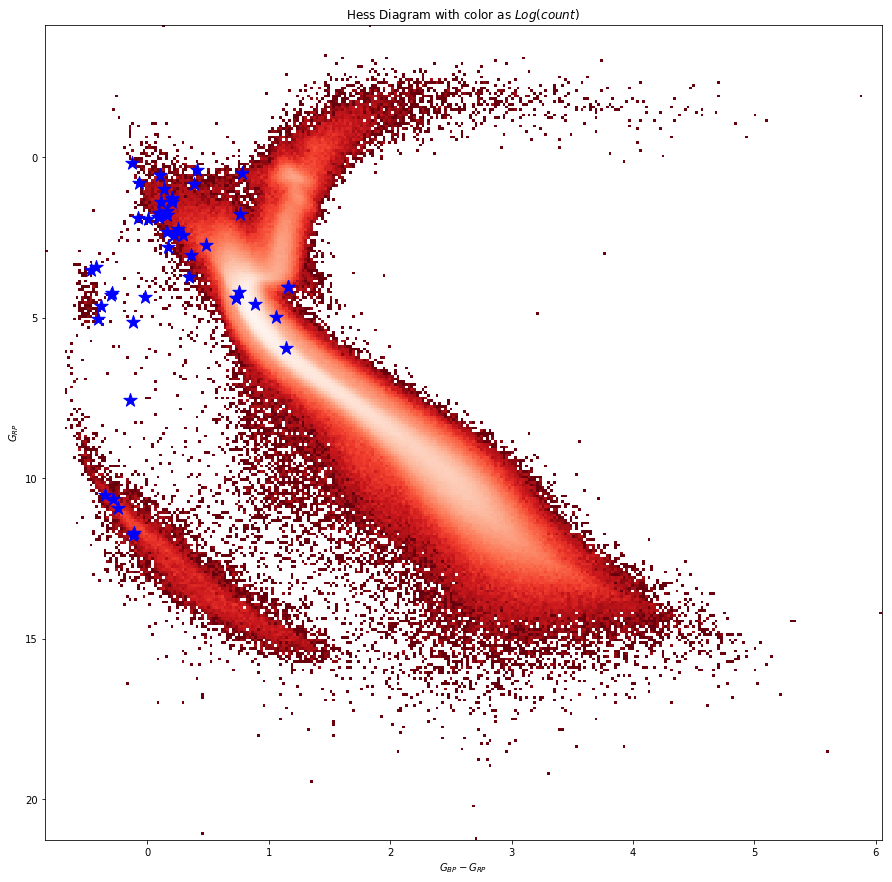

In [31]:
#create final CMD
import matplotlib.cm as cm
cmap1 = cm.get_cmap('Reds_r')
plt.figure(figsize=[15,15])
#plt.pcolormesh(galhess.x_edge,galhess.y_edge,(galhess.statistic.T)**0.25,cmap=cmap1)
plt.imshow(np.log10(galhess.statistic.T), origin='lower',extent=[galhess.x_edge[0], galhess.x_edge[-1], galhess.y_edge[0], galhess.y_edge[-1]],aspect='auto', interpolation='nearest', cmap=cmap1)
plt.scatter(heir['phot_bp_mean_mag']-heir['phot_rp_mean_mag'],absG,marker='*',s=200,c='blue')
plt.gca().invert_yaxis()
#plt.ylim(21.5,9.5)
plt.xlabel(r'$G_{BP}-G_{RP}$')
plt.ylabel(r'$G_{RP}$')
plt.title(r'Hess Diagram with color as $Log(count)$')
plt.savefig('galhess.pdf',bbox_inches='tight')
plt.show()